# 3 Preprocessing and Training Data

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
      * [3.2.1 Objective](#3.2.1_Objective)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
    * [3.4.1 Explore The Data](#3.4.1_Explore_The_Data)
    * [3.4.2 Fixing Categorical Data](#3.4.2_Fixing_Data)
  * [3.5 Train/Test_Split](#3.5_Train/Test_Split)
  * [3.6 Initial Average Mode](#3.6_Average_Model)
  * [3.7 Metrics](#3.7_Metrics)
  * [3.8 Imputations](#3.8_Imputations)
  * [3.9 Dimensitionality Reduction](#3.9_Dimensionality)
      * [3.9.1 Manual Imputation](#3.9.1_Manual_Imputations)   
  * [3.10 Gradient Boosting Model](#3.10_Gradient_Boosting)
  * [3.11 Hyper-parameter Tuning Gradient Boost](#3.11_Hyper_parameter_Tuning)
  * [3.12 Best Model](#3.12_Best_Model)

## 3.2 Introduction<a id='3.2_Introduction'></a>

##### With completion of Data Wrangling and Exploration of our dataset we now start processing and gathering training data. Our clients Capital Fortune asked us to find the best housing models/types that would yield the highest return on investment.  Our target feature is price in our final dataframe, which will be predicting for house prices which we will later analysis upon which houses yield the highest returns on investment for Capital Fortune. 

### 3.2.1 Objective<a id='3.2.1_Objective'></a>

##### We want to make sure our data is as digestible as possible so we may implement machine learning algorithms to best estimate house prices, and which features leads to increased price on an house. We will start via analysis which features need to be re-evaluated and make proper adjustments so we may implement our algorithms with ease. For instances for catagorical variables we will need to utilize dummy variables so it can be inputed into our algorithm and etc. The main goal is to make our final dataset be able easily integratable into machine learning algorithms.

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as tick
import sklearn.model_selection

import featuretools as ft
from sklearn import neighbors, datasets, preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

In [2]:
df = pd.read_csv('../Data/final_nyc_df.csv')

### 3.4.1 Explore the data<a id='3.4.1_Explore_The_Data'></a>

In [3]:
print(df.shape)
print(df.describe())
print(df.dtypes)

(59262, 27)
           ZipCode      latitude     longitude         price  propertyTaxRate  \
count  59255.00000  59262.000000  59262.000000  5.926200e+04     59250.000000   
mean   10913.02977     40.696298    -73.926901  1.083250e+06         0.823852   
std      514.46863      0.094100      0.132106  2.347253e+06         0.098343   
min      148.00000     40.498634    -74.253983  1.000000e+05         0.650000   
25%    10314.00000     40.618461    -73.996172  5.100000e+05         0.840000   
50%    11210.00000     40.694778    -73.904606  7.000000e+05         0.840000   
75%    11367.00000     40.756160    -73.829042  9.900000e+05         0.870000   
max    13277.00000     40.912682    -73.700432  9.272502e+07         2.370000   

         Annual_Tax  Tax_Assessed_Value  Lot_Size(SqFT)    $_Per_SqFT  \
count  5.060600e+04        4.881500e+04    4.998600e+04  4.998600e+04   
mean   2.121627e+04        1.277692e+06    7.484192e+04  4.571731e+05   
std    1.812653e+05        9.550726e+06

##### We want to make sure our data-types are compatible so we should try to change all catagorical variables to either numeric representation or dummy variables

##### Lets start by working on Variables that are true and false by making them either 0 or 1 0 if false and 1 if true.

In [4]:
df.Basement = pd.get_dummies(df.Basement, drop_first=True).values
df.Cooling_Available = pd.get_dummies(df.Cooling_Available, drop_first=True).values
df.Fireplace_Available = pd.get_dummies(df.Fireplace_Available, drop_first=True).values
df.Heating_Available = pd.get_dummies(df.Heating_Available, drop_first=True).values
df.Spa_Available = pd.get_dummies(df.Spa_Available, drop_first=True).values

### 3.4.2 Fixing Categorical Data<a id='3.4.2_Fixing_Data'></a>

##### The zipcode only has 7 missing values I think it would appropriate to just fill in those missing values based on their address and location

In [5]:
df[df.ZipCode.isnull()]

,City,Borough,Neighborhood,StreetAddress,ZipCode,latitude,longitude,price,propertyTaxRate,Annual_Tax,...,Total_Bathrooms,Full_Bathrooms,Half_Bathrooms,ParkingType,Basement,Cooling_Available,Fireplace_Available,Heating_Available,Spa_Available,Story_Building
1128,Bronx,Bronx,University Heights,W Fordham Rd,NaN,40.861465,-73.914680,31550000.0,0.95,97169.0,...,5.0,NaN,NaN,0 spaces,0,0,0,0,0,1.0
4725,Bronx,Bronx,Fordham Manor,Bailey Ave,NaN,40.866638,-73.908234,2775000.0,0.95,46.0,...,3.0,NaN,NaN,0 spaces,0,0,0,0,0,1.0
8927,Queens,Queens,Long Island City,50-02 Midtown Tun Plz,NaN,40.741753,-73.947235,1500000.0,0.84,64094.0,...,3.0,NaN,NaN,0 spaces,0,0,0,0,0,1.0
21171,Staten island,Staten Island,Castleton Corners,N Gannon Ave,NaN,40.609570,-74.125153,500000.0,0.87,2282.0,...,3.0,NaN,NaN,0 spaces,0,0,0,0,0,1.0
25046,Staten island,Staten Island,Charleston,Englewood Ave,NaN,40.531796,-74.220421,130000.0,0.87,2418.0,...,2.0,NaN,NaN,0 spaces,0,0,0,0,0,1.0
28989,Rochester,Queens,Jamaica,Cedar Dr,NaN,40.698139,-73.832207,115000.0,2.37,NaN,...,2.0,NaN,NaN,0 spaces,0,0,0,0,0,1.0
34045,Brooklyn,Brooklyn,Brighton Beach,24 Brighton 3 Ln,NaN,40.579765,-73.964851,549000.0,0.65,2500.0,...,1.0,1.0,0.0,None,0,0,0,1,0,1.0


In [6]:
df.ZipCode.iloc[1128] = 10468
df.ZipCode.iloc[4725] = 10463
df.ZipCode.iloc[8927] = 11101
df.ZipCode.iloc[21171] = 10314
df.ZipCode.iloc[25046] = 10309
df.ZipCode.iloc[28989] = 11411
df.ZipCode.iloc[34045] = 11235

### We also need to fix categorical data into numerical representation via encoding 
#### While we can encode street address into different numbers but this would be very large thus I believe it provides no relative information that impact our target variable price thus this will also be dropped

#### After much analysis using randomforest most impactful features, as well as variance explained it was evident that feature ParkingType had little to no effect on price and given that it is a categorical data with over 600 different options it is clear that it should be dropped and "$_Per_SqFT" as it was a manufactured feature by me 

In [7]:
df = df.drop(['StreetAddress','ParkingType', '$_Per_SqFT' ], axis=1)

##### We will convert HomeType catagorical values using dummy variable encoding with pandas get_dummies function

In [8]:
counts = df.HomeType.value_counts()
mask = df.HomeType.isin(counts[counts < 130].index)
df.HomeType[mask] = 'Other'
r_mask = df[df['HomeType'] == 'Residential Income']['HomeType'].index
df.HomeType[r_mask] = 'Residential'
df.HomeType = (pd.Categorical(df.HomeType))

In [9]:
df.HomeType = pd.Categorical(df.HomeType)
df.HomeType = df.HomeType.cat.codes

In [10]:
df.Borough = pd.Categorical(df.Borough)
df.Borough = df.Borough.cat.codes

In [11]:
df.City = pd.Categorical(df.City)
df.City = df.City.cat.codes

In [12]:
df.Neighborhood = pd.Categorical(df.Neighborhood)
df.Neighborhood = df.Neighborhood.cat.codes

In [13]:
df.City.value_counts()

38     12757
204    11991
37      8718
102     6306
68      5996
       ...  
207        1
175        1
143        1
79         1
0          1
Name: City, Length: 274, dtype: int64

In [14]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count', '%'])

,count,%
City,0,0.000000
Borough,0,0.000000
Neighborhood,0,0.000000
ZipCode,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
price,0,0.000000
HomeType,0,0.000000
Bedrooms,0,0.000000
Total_Bathrooms,0,0.000000


<ipython-input-15-f62e875c7167>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'City'}>,
        <AxesSubplot:title={'center':'Borough'}>,
        <AxesSubplot:title={'center':'Neighborhood'}>,
        <AxesSubplot:title={'center':'ZipCode'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'propertyTaxRate'}>,
        <AxesSubplot:title={'center':'Annual_Tax'}>,
        <AxesSubplot:title={'center':'Tax_Assessed_Value'}>],
       [<AxesSubplot:title={'center':'Lot_Size(SqFT)'}>,
        <AxesSubplot:title={'center':'LivingArea_Space(SqFT)'}>,
        <AxesSubplot:title={'center':'HomeType'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'Bedrooms'}>],
       [<AxesSubplot:title={'center':'Total_Bathrooms'}>,
        <AxesSubplot:title={'center':'Full_Bathrooms'}>,
        <AxesSubplot:title={'center':'Half_Bathrooms'}>,
        <AxesSubplot:tit

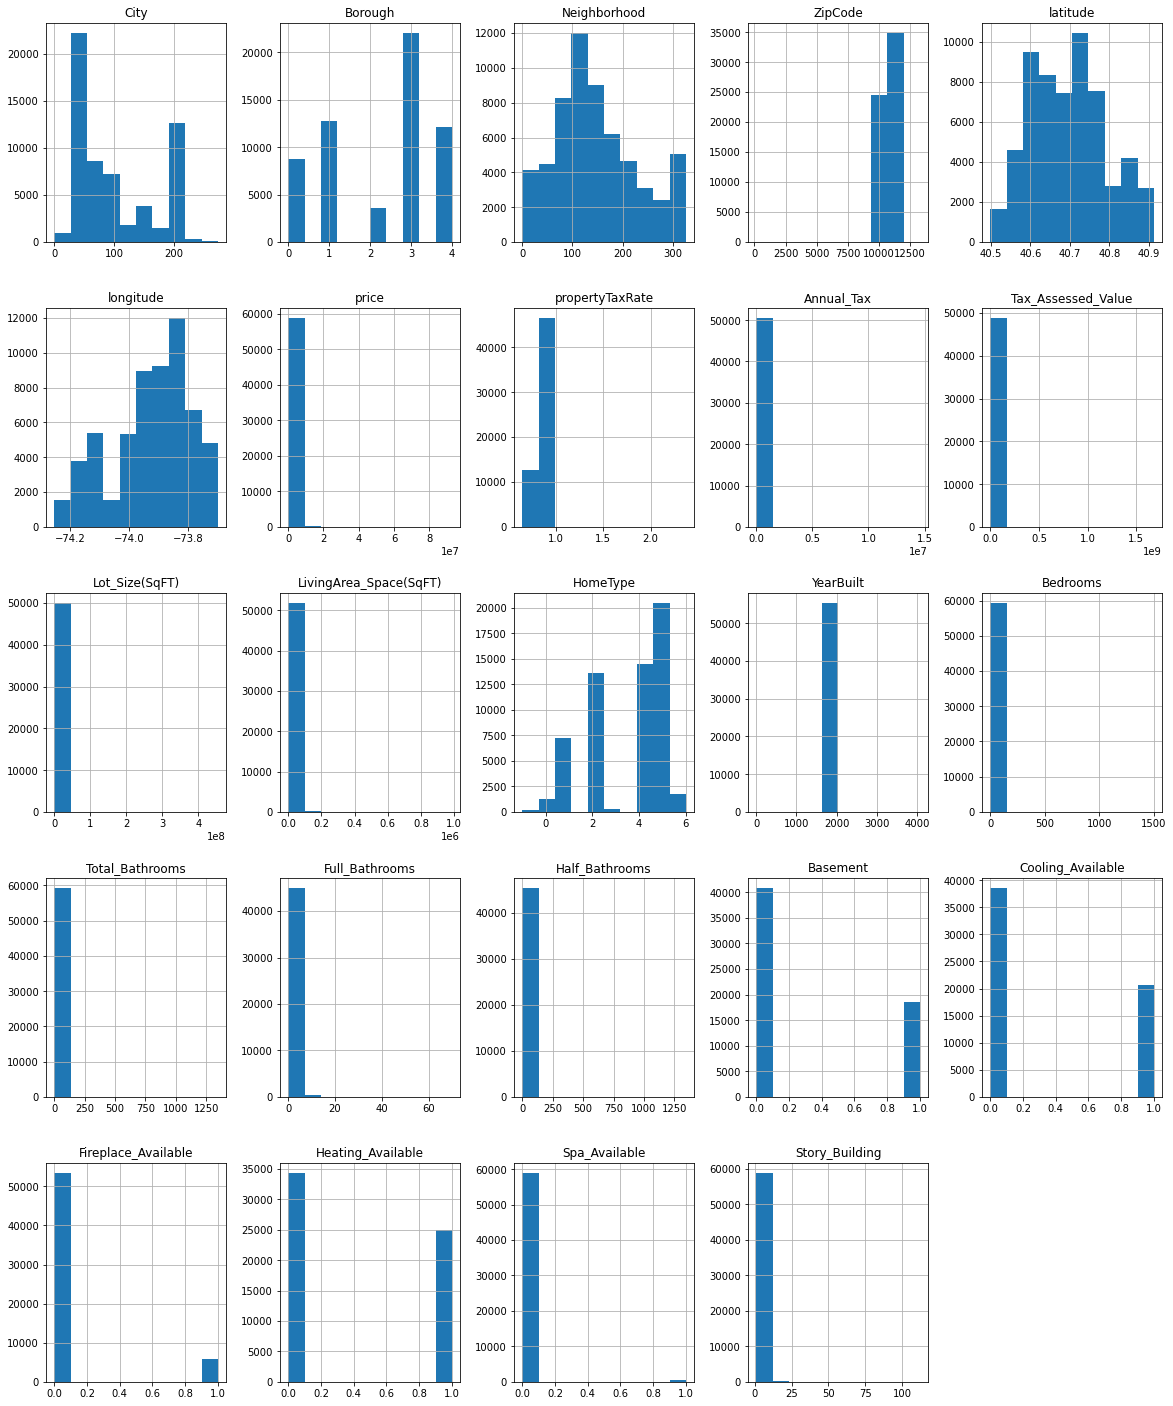

In [15]:
# Let's check the distribution of our features to better understand a better type of imputation
fig = plt.figure(figsize = (20,25))
ax = fig.gca()
df.hist(ax = ax)


## 3.5 Train/Test_Split<a id='3.5_Train/Test_Split'></a>

In [16]:
X = df.drop([ 'price'] ,axis=1)
y = df.price

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

In [18]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(47409, 23) (11853, 23)
(47409,) (11853,)


In [19]:
X_train.dtypes

City                        int16
Borough                      int8
Neighborhood                int16
ZipCode                   float64
latitude                  float64
longitude                 float64
propertyTaxRate           float64
Annual_Tax                float64
Tax_Assessed_Value        float64
Lot_Size(SqFT)            float64
LivingArea_Space(SqFT)    float64
HomeType                     int8
YearBuilt                 float64
Bedrooms                  float64
Total_Bathrooms           float64
Full_Bathrooms            float64
Half_Bathrooms            float64
Basement                    uint8
Cooling_Available           uint8
Fireplace_Available         uint8
Heating_Available           uint8
Spa_Available               uint8
Story_Building            float64
dtype: object

## 3.6 Initial Average Model<a id='3.6_Average_Model'></a>

#### Let's start by seeing what an average guess would yield for some performance comparison

In [20]:
train_mean = y_train.mean()

In [21]:
from sklearn.dummy import DummyRegressor

dummy_reg = DummyRegressor(strategy='mean')
dummy_reg.fit(X_train, y_train)
print(dummy_reg.constant_)

[[1081986.54088886]]


## 3.7 Metrics<a id='3.7_Metrics'></a>

#### R-squared will be one of our metrics used to evaluate performance

In [22]:
y_pred_mean = train_mean * np.ones(len(y_test))

r2_score(y_test, y_pred_mean)

#### Well that is bad  

-8.028135457527341e-06

In [23]:
print(mean_absolute_error(y_test, y_pred_mean))
# Meaning there is on average a difference of 730k in actual price to predicted price which is pretty bad

737177.2129790141


## 3.8 Imputations<a id='3.8_Imputations'></a>

##### We will impute the property taxrate, annual taxrate and Tax_Assessed_Value with the average of each column rates of their respective neighborhood so if a house in Jamaica is missing a value for taxrate we will take the average taxrate in the houses in jamaica and impute in for the missing value

In [24]:
X_mean = round(X_train.mean(),3)

X_train_mean = X_train.fillna(X_mean)
X_test_mean = X_test.fillna(X_mean)

### 3.8.1 Scaling the Data<a id='3.8.1_Scale'></a>

In [25]:
scaler = StandardScaler()
scaler.fit(X_train_mean)
X_train_mean_scaled = scaler.transform(X_train_mean)
X_test_mean_scaled = scaler.transform(X_test_mean)

#### Train the model on the train split and then make prediction using the test split

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train_mean_scaled, y_train)
y_train_mean_pred = lm.predict(X_train_mean_scaled)
y_test_mean_pred = lm.predict(X_test_mean_scaled)

In [27]:
print("R2 of Y_train mean prediction's:", r2_score(y_train, y_train_mean_pred))
print("R2 of Y_test mean prediction's:",r2_score(y_test, y_test_mean_pred))
print("MAE of Y_train mean prediction's:",mean_absolute_error(y_train, y_train_mean_pred))
print("MAE of Y_test mean prediction's:",mean_absolute_error(y_test, y_test_mean_pred))


R2 of Y_train mean prediction's: 0.16002158613352258
R2 of Y_test mean prediction's: -0.042567405042530426
MAE of Y_train mean prediction's: 714767.6316323939
MAE of Y_test mean prediction's: 731910.8801522799


In [28]:
#### Where does the large error coming from for example is it from small values or large values 

##### Well it didn't improve performance significantly but it seems some imputation has helped slightly 

#### Well we can see that the mean was a poor performer when it came to a linear regression, I suspect the results will be similar, but lets try the median 

In [29]:
X_median = round(X_train.median(),3)

X_train_median = X_train.fillna(X_median)
X_test_median = X_test.fillna(X_median)

In [30]:
scaler = StandardScaler()
scaler.fit(X_train_median)
X_train_median_scaled = scaler.transform(X_train_median)
X_test_median_scaled = scaler.transform(X_test_median)

In [31]:
lm = LinearRegression().fit(X_train_median_scaled, y_train)
y_train_median_pred = lm.predict(X_train_median_scaled)
y_test_median_pred = lm.predict(X_test_median_scaled)

In [32]:
print("R2 of Y_train median prediction's:", r2_score(y_train, y_train_median_pred))
print("R2 of Y_test median prediction's:",r2_score(y_test, y_test_median_pred))
print("MAE of Y_train median prediction's:",mean_absolute_error(y_train, y_train_median_pred))
print("MAE of Y_test median prediction's:",mean_absolute_error(y_test, y_test_median_pred))

R2 of Y_train median prediction's: 0.15855294843387435
R2 of Y_test median prediction's: -0.07204530447021384
MAE of Y_train median prediction's: 723930.7084087887
MAE of Y_test median prediction's: 742150.8546457785


#### No significant difference in results of using median vs mean, lets try a more intuitive approach, we can impute the taxrate, annual_tax and tax_assessed_value depending on the zipcode of the house which would align more properly rather than just use the mean or median

## 3.9 Dimensitionality Reduction<a id='3.9_Dimensitionality'></a>

##### With 27 features let's take a look at how each feature impact our dependent variable 'Price' and attempt to reduce the number of features we have. We also need to acknowledge that 'Per_SqFT' was a feature created by me, as it was created combining price/lot_size thus it clearly has a big impact on price but we since it was manufactured and has price directly into it we need to drop this column. 

#### First lets split our data to train and split to see which features effect what and how we can further reduce the dimensitionality of our feature set

### Using RandomForest to find most impactful features

#### Lets use a different model which would yield greater results for instances randomforest

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=100, max_depth=10)
rf.fit(X_train_mean_scaled,y_train)
y_train_mean_pred = rf.predict(X_train_mean_scaled)
y_test_mean_pred = rf.predict(X_test_mean_scaled)

In [34]:
print("R2 of Y_train mean prediction's:", r2_score(y_train, y_train_mean_pred))
print("R2 of Y_test mean prediction's:",r2_score(y_test, y_test_mean_pred))
print("MAE of Y_train mean prediction's:",mean_absolute_error(y_train, y_train_mean_pred))
print("MAE of Y_test mean prediction's:",mean_absolute_error(y_test, y_test_mean_pred))

R2 of Y_train mean prediction's: 0.8961985603343341
R2 of Y_test mean prediction's: 0.6579980330633131
MAE of Y_train mean prediction's: 257074.86998670624
MAE of Y_test mean prediction's: 331936.9711001494


In [35]:
rf = RandomForestRegressor(random_state=100, max_depth=10)
rf.fit(X_train_median_scaled,y_train)
y_train_med_pred = rf.predict(X_train_median_scaled)
y_test_med_pred = rf.predict(X_test_median_scaled)

In [36]:
print("R2 of Y_train mean prediction's:", r2_score(y_train, y_train_med_pred))
print("R2 of Y_test mean prediction's:",r2_score(y_test, y_test_med_pred))
print("MAE of Y_train mean prediction's:",mean_absolute_error(y_train, y_train_med_pred))
print("MAE of Y_test mean prediction's:",mean_absolute_error(y_test, y_test_med_pred))

R2 of Y_train mean prediction's: 0.8900171443150857
R2 of Y_test mean prediction's: 0.6349877423071595
MAE of Y_train mean prediction's: 264942.4402923692
MAE of Y_test mean prediction's: 339624.73661779106


#### It seems utilizing a different model has yield significant results we can see decision tree in this case randomforest has done much better than our standard linear model. While it seems our train set significantly more improvement than our test our ultimate goal is the get the best results for our test set without overfitting.

##### Let's take a look at the most impactful features utilizing randomforest

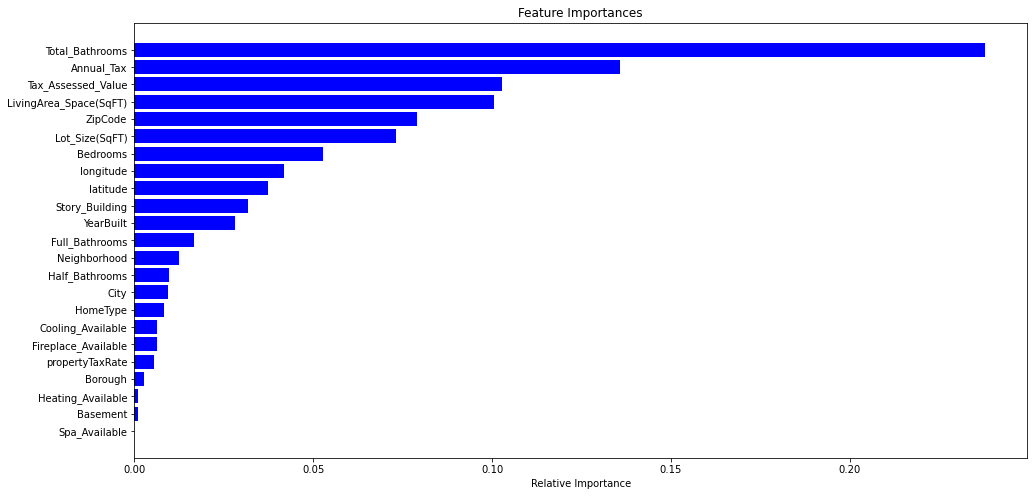

In [37]:
features = X_train_mean.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[-26:] 
plt.figure(figsize=(16,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [38]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count', '%'])

,count,%
City,0,0.000000
Borough,0,0.000000
Neighborhood,0,0.000000
ZipCode,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
price,0,0.000000
HomeType,0,0.000000
Bedrooms,0,0.000000
Total_Bathrooms,0,0.000000


#### It seems the following had little to no impact on price, 'Basement', 'Cooling_Available', 'Fireplace_Available', 'Heating_Available', 'Spa_Available', 'City, 'Borough' and both Full_Bathrooms and Half_Bathrooms have high ratio of high missing data. 

### 3.9.1 Manual Imputation<a id='3.9.1_Manual_Imputations'></a>

#### We will try a selective imputation based off zipcode  to see if this yields better results than just imputing the mean

In [39]:
X_train_im = X_train.drop(['Basement', 'Cooling_Available', 'Fireplace_Available', 'Heating_Available', 'Spa_Available', 'City', 'Borough', 'Full_Bathrooms', 'Half_Bathrooms'],axis=1)
X_test_im = X_test.drop(['Basement', 'Cooling_Available', 'Fireplace_Available', 'Heating_Available', 'Spa_Available', 'City', 'Borough', 'Full_Bathrooms', 'Half_Bathrooms'],axis=1)


In [40]:
train_TaxRate = X_train_im[X_train_im.propertyTaxRate.isnull()].index
for i in train_TaxRate:
    x  = (X_train_im.ZipCode[i])
    y = X_train_im.propertyTaxRate[i]
    y = (round(np.mean(X_train_im[X_train_im.ZipCode == x].propertyTaxRate),3))
    X_train_im.propertyTaxRate[i] = y

    
test_TaxRate = X_test_im[X_test_im.propertyTaxRate.isnull()].index
for i in test_TaxRate:
    x  = (X_test_im.ZipCode[i])
    y = X_test_im.propertyTaxRate[i]
    y = (round(np.mean(X_test_im[X_test_im.ZipCode == x].propertyTaxRate),3))
    X_test_im.propertyTaxRate[i] = y
    

In [41]:
train_meananTax = X_train_im[X_train_im.Annual_Tax.isnull()].index
for i in train_meananTax:
    x  = (X_train_im.ZipCode[i])
    y = X_train_im.Annual_Tax[i]
    y = (round(np.mean(X_train_im[X_train_im.ZipCode == x].Annual_Tax),3))
    X_train_im.Annual_Tax[i] = y
    
test_meananTax = X_test_im[X_test_im.Annual_Tax.isnull()].index
for i in test_meananTax:
    x  = (X_test_im.ZipCode[i])
    y = X_test_im.Annual_Tax[i]
    y = (round(np.mean(X_test_im[X_test_im.ZipCode == x].Annual_Tax),3))
    X_test_im.Annual_Tax[i] = y

In [42]:
train_meanTATax = X_train_im[X_train_im.Tax_Assessed_Value.isnull()].index
for i in train_meanTATax:
    x  = (X_train_im.ZipCode[i])
    y = X_train_im.Tax_Assessed_Value[i]
    y = (round(np.mean(X_train_im[X_train_im.ZipCode == x].Tax_Assessed_Value),3))
    X_train_im.Tax_Assessed_Value[i] = y

test_meanTATax = X_test_im[X_test_im.Tax_Assessed_Value.isnull()].index
for i in test_meanTATax:
    x  = (X_test_im.ZipCode[i])
    y = X_test_im.Tax_Assessed_Value[i]
    y = (round(np.mean(X_test_im[X_test_im.ZipCode == x].Tax_Assessed_Value),3))
    X_test_im.Tax_Assessed_Value[i] = y

In [43]:
train_meanYRTax = X_train_im[X_train_im.YearBuilt.isnull()].index
for i in train_meanYRTax:
    x  = (X_train_im.ZipCode[i])
    y = X_train_im.YearBuilt[i]
    y = (round(np.mean(X_train_im[X_train_im.ZipCode == x].YearBuilt),3))
    X_train_im.YearBuilt[i] = y
    
test_meanYRTax = X_test_im[X_test_im.YearBuilt.isnull()].index
for i in test_meanYRTax:
    x  = (X_test_im.ZipCode[i])
    y = X_test_im.YearBuilt[i]
    y = (round(np.mean(X_test_im[X_test_im.ZipCode == x].YearBuilt),3))
    X_test_im.YearBuilt[i] = y

In [44]:
train_meanLATax = X_train_im[X_train_im['LivingArea_Space(SqFT)'].isnull()].index
for i in train_meanLATax:
    x  = (X_train_im.ZipCode[i])
    y = X_train_im['LivingArea_Space(SqFT)'][i]
    y = (round(np.mean(X_train_im[X_train_im.ZipCode == x]['LivingArea_Space(SqFT)']),3))
    X_train_im['LivingArea_Space(SqFT)'][i] = y
    
    
test_meanLATax = X_test_im[X_test_im['LivingArea_Space(SqFT)'].isnull()].index
for i in test_meanLATax:
    x  = (X_test_im.ZipCode[i])
    y = X_test_im['LivingArea_Space(SqFT)'][i]
    y = (round(np.mean(X_test_im[X_test_im.ZipCode == x]['LivingArea_Space(SqFT)']),3))
    X_test_im['LivingArea_Space(SqFT)'][i] = y

In [45]:
train_meanLATax = X_train_im[X_train_im['Lot_Size(SqFT)'].isnull()].index
for i in train_meanLATax:
    x  = (X_train_im.ZipCode[i])
    y = X_train_im['Lot_Size(SqFT)'][i]
    y = (round(np.mean(X_train_im[X_train_im.ZipCode == x]['Lot_Size(SqFT)']),3))
    X_train_im['Lot_Size(SqFT)'][i] = y
    
    
test_meanLATax = X_test_im[X_test_im['Lot_Size(SqFT)'].isnull()].index
for i in test_meanLATax:
    x  = (X_test_im.ZipCode[i])
    y = X_test_im['Lot_Size(SqFT)'][i]
    y = (round(np.mean(X_test_im[X_test_im.ZipCode == x]['Lot_Size(SqFT)']),3))
    X_test_im['Lot_Size(SqFT)'][i] = y

In [46]:
X_train_im = X_train_im.fillna(X_train_im.mean())
X_test_im = X_test_im.fillna(X_test_im.mean())

In [47]:
rf = RandomForestRegressor(random_state=100, max_depth=10)
rf.fit(X_train_im,y_train)
y_train_im_pred = rf.predict(X_train_im)
y_test_im_pred = rf.predict(X_test_im)

In [48]:
print("R2 of Y_train zipcode mean prediction's:", r2_score(y_train, y_train_im_pred))
print("R2 of Y_test zipcode mean prediction's:",r2_score(y_test, y_test_im_pred))
print("MAE of Y_train zipcode mean prediction's:",mean_absolute_error(y_train, y_train_im_pred))
print("MAE of Y_test zipcode mean prediction's:",mean_absolute_error(y_test, y_test_im_pred))

R2 of Y_train zipcode mean prediction's: 0.8836923439855562
R2 of Y_test zipcode mean prediction's: 0.6182285453556258
MAE of Y_train zipcode mean prediction's: 264827.5281782541
MAE of Y_test zipcode mean prediction's: 344277.4571345384


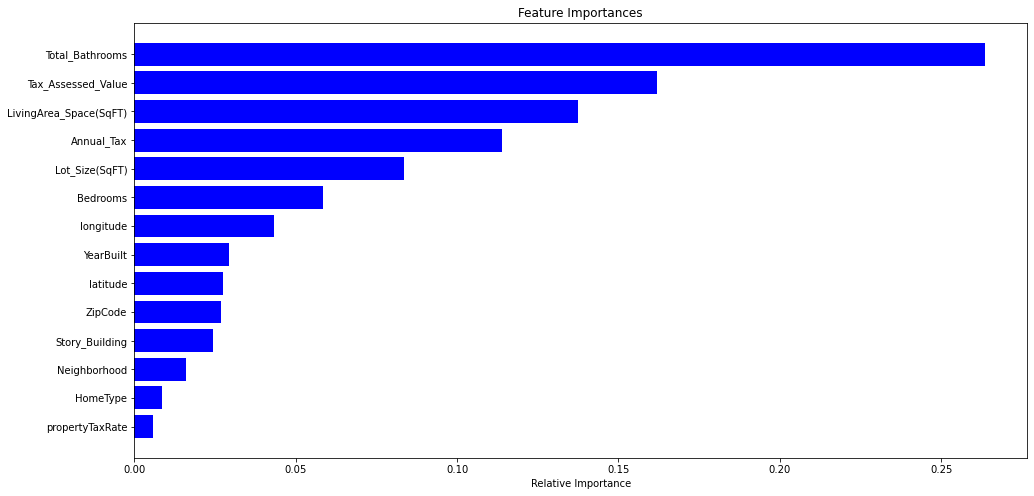

In [49]:
features = X_train_im.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[-26:] 
plt.figure(figsize=(16,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### It did not yield better results, while insignificant  the performance was worse than the mean

#### Let's check our feature importance using a mean imputation

In [50]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=100, max_depth=10)
model.fit(X_train.fillna(X_train.mean()),y_train)

RandomForestRegressor(max_depth=10, random_state=100)

In [51]:
y_pred_test = model.predict(X_test.fillna(X_test.mean()))
y_pred_train = model.predict(X_train.fillna(X_train.mean()))
print(r2_score(y_test, y_pred_test),r2_score(y_train, y_pred_train)) 

0.6465461544929338 0.8963039791744637


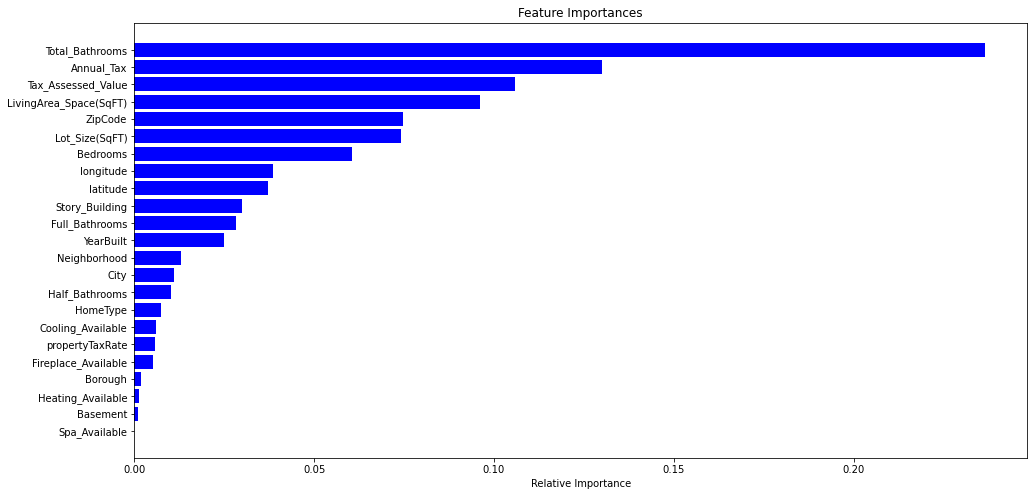

In [52]:
features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-26:] 
plt.figure(figsize=(16,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### It seems that the following have little to no impact Neighborhood, ParkingType, City, Heating_Available, Half_Bathrooms, Fireplace, Cooling, Basement, and Spa_Available. Lets remove these features and try to see if we yield a better r2_score. Even though full_bathrooms might have some indication I am going to input on the train data and with 0 for missing values for it. 

In [53]:
train_df_2 = df.drop(columns=['City', 'Neighborhood', 'Half_Bathrooms',
       'Basement', 'Cooling_Available', 'Fireplace_Available',
       'Heating_Available', 'Spa_Available'], axis=1)

In [54]:
train_df_2.Full_Bathrooms.fillna(round(np.mean(train_df_2.Full_Bathrooms), 2))

0        1.00
1        7.00
2        3.00
3        6.00
4        5.00
         ... 
59257    0.00
59258    5.00
59259    4.00
59260    1.96
59261    1.00
Name: Full_Bathrooms, Length: 59262, dtype: float64

In [55]:
train_df_2 = train_df_2.dropna()

In [56]:
X_2 = train_df_2.drop([ 'price'] ,axis=1)
y_2 = train_df_2.price

In [57]:
X_2.shape
#While our dataset definately reduced its still a alot to work with I don't believe we will overfit as we still have 35k observations

(33283, 15)

In [58]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=.3, random_state=100)
rf = RandomForestRegressor(random_state=100, max_depth=10)
rf.fit(X_train_2,y_train_2)

RandomForestRegressor(max_depth=10, random_state=100)

In [59]:
y_pred = rf.predict(X_test_2)
print(r2_score(y_test_2, y_pred))
y_pred = rf.predict(X_train_2)
print(r2_score(y_train_2, y_pred))

0.6457979953539843
0.9317301155133008


#### These are the best results so far I think this is the best iterations of our training and test dataset and in our next notebook of modeling we will further fine tune and select the best machine learning algorithm to perform further test to get the best model.

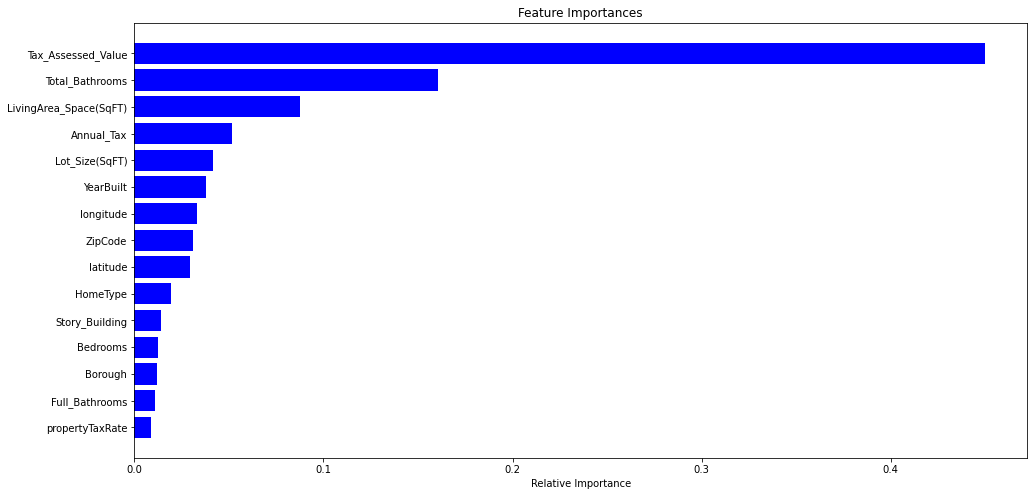

In [60]:
features = X_train_2.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[-26:] 
plt.figure(figsize=(16,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### That was a great move, our R2_score has increased significantly so now we know which features to drop

## 3.10 Gradient Boosting Model<a id='3.10_Gradient_Boosting'></a>

In [61]:
import xgboost as xgb

In [62]:
X_df = df.drop(['City', 'Borough', 'Neighborhood', 'price', 'Basement', 'Cooling_Available', 'Fireplace_Available', 'Heating_Available', 'Spa_Available', 'Story_Building'], axis=1)
X = X_df.values
y = df.price.values

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

In [64]:
GB_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler(),
    xgb.XGBRegressor()
)

In [65]:
GB_pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [66]:
test_preds = GB_pipe.predict(X_test)
train_preds = GB_pipe.predict(X_train)

In [67]:
print("R2 of Y_train  GB prediction's:", r2_score(y_train, train_preds))
print("R2 of Y_test  GB prediction's:",r2_score(y_test, test_preds))
print("MAE of Y_train GB prediction's:",mean_absolute_error(y_train, train_preds))
print("MAE of Y_test GB prediction's:",mean_absolute_error(y_test, test_preds))

R2 of Y_train  GB prediction's: 0.9721973242384186
R2 of Y_test  GB prediction's: 0.674905875614883
MAE of Y_train GB prediction's: 183873.36004355055
MAE of Y_test GB prediction's: 308744.5659442098


In [68]:
gb = xgb.XGBRegressor()

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

In [70]:
gb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
pred_test = gb.predict(X_test)
pred_train = gb.predict(X_train)

In [72]:
print("R2 of Y_train  GB prediction's:", r2_score(y_train, pred_train))
print("R2 of Y_test  GB prediction's:",r2_score(y_test, pred_test))
print("MAE of Y_train GB prediction's:",mean_absolute_error(y_train, pred_train))
print("MAE of Y_test GB prediction's:",mean_absolute_error(y_test, pred_test))

R2 of Y_train  GB prediction's: 0.9741367029504042
R2 of Y_test  GB prediction's: 0.732608903899179
MAE of Y_train GB prediction's: 180999.81921811824
MAE of Y_test GB prediction's: 296157.9898410476


#### It seems we get a slight performance boost without StandardScaler and mean imputation

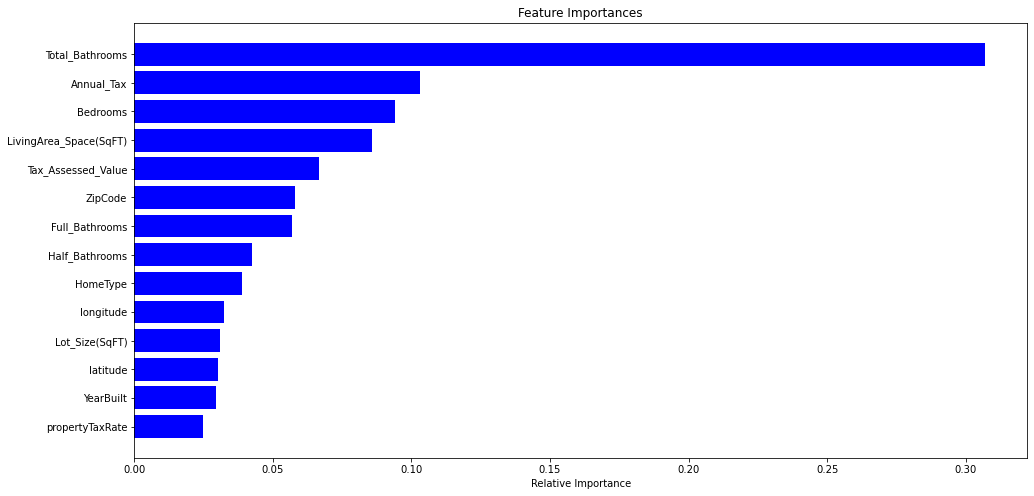

In [73]:
features = X_df.columns
importances = gb.feature_importances_
indices = np.argsort(importances)[-26:] 
plt.figure(figsize=(16,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 3.11 Hyper-parameter Tuning Gradient Boost<a id='3.11_Hyper_parameter_Tuning'></a> 

In [142]:
feature_names = X_df.columns

log_y_train = np.log(y_train)
log_y_test = np.log(y_test)

dtrain = xgb.DMatrix(X_train, label=log_y_train, feature_names=feature_names)

dtest = xgb.DMatrix(X_test, label=log_y_test, feature_names=feature_names)


In [143]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
}


In [144]:
params['eval_metric'] = "mae"
num_boost_round = 999
evallist  = [(X_test,'eval'), (X_train,'train')]


In [145]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-mae:9.11658
[1]	Test-mae:6.38162
[2]	Test-mae:4.46626
[3]	Test-mae:3.12529
[4]	Test-mae:2.18649
[5]	Test-mae:1.53001
[6]	Test-mae:1.07393
[7]	Test-mae:0.76170
[8]	Test-mae:0.55174
[9]	Test-mae:0.41441
[10]	Test-mae:0.32815
[11]	Test-mae:0.27491
[12]	Test-mae:0.24529
[13]	Test-mae:0.22901
[14]	Test-mae:0.22057
[15]	Test-mae:0.21559
[16]	Test-mae:0.21230
[17]	Test-mae:0.20993
[18]	Test-mae:0.20856
[19]	Test-mae:0.20721
[20]	Test-mae:0.20670
[21]	Test-mae:0.20572
[22]	Test-mae:0.20517
[23]	Test-mae:0.20484
[24]	Test-mae:0.20452
[25]	Test-mae:0.20356
[26]	Test-mae:0.20351
[27]	Test-mae:0.20281
[28]	Test-mae:0.20261
[29]	Test-mae:0.20232
[30]	Test-mae:0.20184
[31]	Test-mae:0.20168
[32]	Test-mae:0.20120
[33]	Test-mae:0.20114
[34]	Test-mae:0.20109
[35]	Test-mae:0.20091
[36]	Test-mae:0.20093
[37]	Test-mae:0.20086
[38]	Test-mae:0.20084
[39]	Test-mae:0.20035
[40]	Test-mae:0.20049
[41]	Test-mae:0.20051
[42]	Test-mae:0.20052
[43]	Test-mae:0.20023
[44]	Test-mae:0.20000
[45]	Test-mae:0.2000

In [146]:
print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best MAE: 0.20 with 108 rounds


In [147]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=100,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,9.121352,0.000798,9.121437,0.004334
1,6.386202,0.000541,6.386581,0.003635
2,4.471341,0.000492,4.471731,0.003482
3,3.131072,0.000372,3.131723,0.003472
4,2.192611,0.000241,2.193239,0.003565
...,...,...,...,...
123,0.152525,0.000677,0.197228,0.002797
124,0.152233,0.000629,0.197159,0.002801
125,0.151934,0.000714,0.197115,0.002813
126,0.151667,0.000664,0.197107,0.002778


In [148]:
cv_results['test-mae-mean'].min()

0.19706400000000002

In [156]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,16)
    for min_child_weight in range(3,7)
]

### The following codes below takes significant amount of time

In [157]:
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=100,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=3, min_child_weight=3
	MAE 0.20140799999999998 for 473 rounds
CV with max_depth=3, min_child_weight=4
	MAE 0.20184599999999997 for 385 rounds
CV with max_depth=3, min_child_weight=5
	MAE 0.2002986 for 483 rounds
CV with max_depth=3, min_child_weight=6
	MAE 0.2017724 for 374 rounds
CV with max_depth=4, min_child_weight=3
	MAE 0.19955799999999999 for 242 rounds
CV with max_depth=4, min_child_weight=4
	MAE 0.1986094 for 309 rounds
CV with max_depth=4, min_child_weight=5
	MAE 0.1984832 for 282 rounds
CV with max_depth=4, min_child_weight=6
	MAE 0.19881920000000003 for 243 rounds
CV with max_depth=5, min_child_weight=3
	MAE 0.19816519999999999 for 204 rounds
CV with max_depth=5, min_child_weight=4
	MAE 0.1978848 for 169 rounds
CV with max_depth=5, min_child_weight=5
	MAE 0.1973298 for 164 rounds
CV with max_depth=5, min_child_weight=6
	MAE 0.1971438 for 209 rounds
CV with max_depth=6, min_child_weight=3
	MAE 0.1976288 for 115 rounds
CV with max_depth=6, min_child_weight=4


In [159]:
params['max_depth'] = 6
params['min_child_weight'] = 5

In [160]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [161]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=100,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
	MAE 0.19703980000000001 for 128 rounds
CV with subsample=1.0, colsample=0.9
	MAE 0.19722939999999997 for 131 rounds
CV with subsample=1.0, colsample=0.8
	MAE 0.19772859999999998 for 140 rounds
CV with subsample=1.0, colsample=0.7
	MAE 0.19766720000000002 for 131 rounds
CV with subsample=0.9, colsample=1.0
	MAE 0.1985418 for 101 rounds
CV with subsample=0.9, colsample=0.9
	MAE 0.198353 for 137 rounds
CV with subsample=0.9, colsample=0.8
	MAE 0.1991504 for 100 rounds
CV with subsample=0.9, colsample=0.7
	MAE 0.19846939999999996 for 124 rounds
CV with subsample=0.8, colsample=1.0
	MAE 0.1988434 for 104 rounds
CV with subsample=0.8, colsample=0.9
	MAE 0.1991272 for 120 rounds
CV with subsample=0.8, colsample=0.8
	MAE 0.19992000000000001 for 95 rounds
CV with subsample=0.8, colsample=0.7
	MAE 0.1993636 for 83 rounds
CV with subsample=0.7, colsample=1.0
	MAE 0.20008940000000003 for 100 rounds
CV with subsample=0.7, colsample=0.9
	MAE 0.201142 for 103 rou

In [162]:
params['subsample'] = 1.0
params['colsample_bytree'] = 1.0

In [163]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time 
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=100,
            nfold=5,
            metrics=['mae'],
            early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

Wall time: 0 ns
CV with eta=0.3
Wall time: 0 ns
	MAE 0.19703980000000001 for 128 rounds

CV with eta=0.2
Wall time: 0 ns
	MAE 0.19364560000000003 for 193 rounds

CV with eta=0.1
Wall time: 0 ns
	MAE 0.1911128 for 379 rounds

CV with eta=0.05
Wall time: 0 ns
	MAE 0.1902544 for 763 rounds

CV with eta=0.01
Wall time: 0 ns
	MAE 0.19649840000000002 for 998 rounds

CV with eta=0.005
Wall time: 0 ns
	MAE 0.22433519999999998 for 998 rounds

Best params: 0.05, MAE: 0.1902544


In [164]:
params['eta'] = 0.05
params

{'max_depth': 6,
 'min_child_weight': 5,
 'eta': 0.05,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'reg:squarederror',
 'eval_metric': 'mae'}

In [165]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-mae:12.37180
[1]	Test-mae:11.75329
[2]	Test-mae:11.16582
[3]	Test-mae:10.60766
[4]	Test-mae:10.07742
[5]	Test-mae:9.57361
[6]	Test-mae:9.09504
[7]	Test-mae:8.64027
[8]	Test-mae:8.20821
[9]	Test-mae:7.79789
[10]	Test-mae:7.40791
[11]	Test-mae:7.03735
[12]	Test-mae:6.68545
[13]	Test-mae:6.35116
[14]	Test-mae:6.03347
[15]	Test-mae:5.73180
[16]	Test-mae:5.44517
[17]	Test-mae:5.17287
[18]	Test-mae:4.91405
[19]	Test-mae:4.66832
[20]	Test-mae:4.43496
[21]	Test-mae:4.21300
[22]	Test-mae:4.00234
[23]	Test-mae:3.80217
[24]	Test-mae:3.61193
[25]	Test-mae:3.43124
[26]	Test-mae:3.25960
[27]	Test-mae:3.09653
[28]	Test-mae:2.94160
[29]	Test-mae:2.79440
[30]	Test-mae:2.65458
[31]	Test-mae:2.52170
[32]	Test-mae:2.39545
[33]	Test-mae:2.27545
[34]	Test-mae:2.16158
[35]	Test-mae:2.05327
[36]	Test-mae:1.95045
[37]	Test-mae:1.85282
[38]	Test-mae:1.76005
[39]	Test-mae:1.67204
[40]	Test-mae:1.58854
[41]	Test-mae:1.50917
[42]	Test-mae:1.43399
[43]	Test-mae:1.36258
[44]	Test-mae:1.29489
[45]	Test-mae:1

[361]	Test-mae:0.19235
[362]	Test-mae:0.19231
[363]	Test-mae:0.19231
[364]	Test-mae:0.19230
[365]	Test-mae:0.19229
[366]	Test-mae:0.19226
[367]	Test-mae:0.19224
[368]	Test-mae:0.19221
[369]	Test-mae:0.19221
[370]	Test-mae:0.19220
[371]	Test-mae:0.19219
[372]	Test-mae:0.19218
[373]	Test-mae:0.19218
[374]	Test-mae:0.19218
[375]	Test-mae:0.19215
[376]	Test-mae:0.19211
[377]	Test-mae:0.19206
[378]	Test-mae:0.19206
[379]	Test-mae:0.19206
[380]	Test-mae:0.19205
[381]	Test-mae:0.19200
[382]	Test-mae:0.19199
[383]	Test-mae:0.19195
[384]	Test-mae:0.19192
[385]	Test-mae:0.19192
[386]	Test-mae:0.19193
[387]	Test-mae:0.19190
[388]	Test-mae:0.19188
[389]	Test-mae:0.19188
[390]	Test-mae:0.19187
[391]	Test-mae:0.19188
[392]	Test-mae:0.19187
[393]	Test-mae:0.19184
[394]	Test-mae:0.19182
[395]	Test-mae:0.19182
[396]	Test-mae:0.19182
[397]	Test-mae:0.19180
[398]	Test-mae:0.19176
[399]	Test-mae:0.19177
[400]	Test-mae:0.19175
[401]	Test-mae:0.19175
[402]	Test-mae:0.19174
[403]	Test-mae:0.19174
[404]	Test-

In [166]:
model.best_iteration

612

In [171]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-mae:12.37180
[1]	Test-mae:11.75329
[2]	Test-mae:11.16582
[3]	Test-mae:10.60766
[4]	Test-mae:10.07742
[5]	Test-mae:9.57361
[6]	Test-mae:9.09504
[7]	Test-mae:8.64027
[8]	Test-mae:8.20821
[9]	Test-mae:7.79789
[10]	Test-mae:7.40791
[11]	Test-mae:7.03735
[12]	Test-mae:6.68545
[13]	Test-mae:6.35116
[14]	Test-mae:6.03347
[15]	Test-mae:5.73180
[16]	Test-mae:5.44517
[17]	Test-mae:5.17287
[18]	Test-mae:4.91405
[19]	Test-mae:4.66832
[20]	Test-mae:4.43496
[21]	Test-mae:4.21300
[22]	Test-mae:4.00234
[23]	Test-mae:3.80217
[24]	Test-mae:3.61193
[25]	Test-mae:3.43124
[26]	Test-mae:3.25960
[27]	Test-mae:3.09653
[28]	Test-mae:2.94160
[29]	Test-mae:2.79440
[30]	Test-mae:2.65458
[31]	Test-mae:2.52170
[32]	Test-mae:2.39545
[33]	Test-mae:2.27545
[34]	Test-mae:2.16158
[35]	Test-mae:2.05327
[36]	Test-mae:1.95045
[37]	Test-mae:1.85282
[38]	Test-mae:1.76005
[39]	Test-mae:1.67204
[40]	Test-mae:1.58854
[41]	Test-mae:1.50917
[42]	Test-mae:1.43399
[43]	Test-mae:1.36258
[44]	Test-mae:1.29489
[45]	Test-mae:1

[361]	Test-mae:0.19235
[362]	Test-mae:0.19231
[363]	Test-mae:0.19231
[364]	Test-mae:0.19230
[365]	Test-mae:0.19229
[366]	Test-mae:0.19226
[367]	Test-mae:0.19224
[368]	Test-mae:0.19221
[369]	Test-mae:0.19221
[370]	Test-mae:0.19220
[371]	Test-mae:0.19219
[372]	Test-mae:0.19218
[373]	Test-mae:0.19218
[374]	Test-mae:0.19218
[375]	Test-mae:0.19215
[376]	Test-mae:0.19211
[377]	Test-mae:0.19206
[378]	Test-mae:0.19206
[379]	Test-mae:0.19206
[380]	Test-mae:0.19205
[381]	Test-mae:0.19200
[382]	Test-mae:0.19199
[383]	Test-mae:0.19195
[384]	Test-mae:0.19192
[385]	Test-mae:0.19192
[386]	Test-mae:0.19193
[387]	Test-mae:0.19190
[388]	Test-mae:0.19188
[389]	Test-mae:0.19188
[390]	Test-mae:0.19187
[391]	Test-mae:0.19188
[392]	Test-mae:0.19187
[393]	Test-mae:0.19184
[394]	Test-mae:0.19182
[395]	Test-mae:0.19182
[396]	Test-mae:0.19182
[397]	Test-mae:0.19180
[398]	Test-mae:0.19176
[399]	Test-mae:0.19177
[400]	Test-mae:0.19175
[401]	Test-mae:0.19175
[402]	Test-mae:0.19174
[403]	Test-mae:0.19174
[404]	Test-

In [174]:
bmlog_pred_test = best_model.predict(dtest)
bmlog_pred_train = best_model.predict(dtrain)

In [189]:
print("MAE of Y_train GB prediction with HP Tuning:",mean_absolute_error(log_y_train, bmlog_pred_train))
print("MAE of Y_test GB prediction with HP Tuning:",mean_absolute_error(log_y_test, bmlog_pred_test))

MAE of Y_train GB prediction with HP Tuning: 0.1605371821907445
MAE of Y_test GB prediction with HP Tuning: 0.18984552348861417


In [190]:
(mean_absolute_error(y_test, bm_pred_test))

260341.58035544798

In [191]:
# Turning our prediction back to base numbers on which we did log
bm_pred_test = np.exp(bmlog_pred_test)
bm_pred_train = np.exp(bmlog_pred_train)

## 3.12 Best Model <a id='3.12_Best_Model'></a>  

### Here are the results of our Gradient Boosting model with and without Hyper-parameter Tuning

In [188]:
print("MAE of Y_train GB prediction with HP Tuning:",mean_absolute_error(y_train, bm_pred_train))
print("MAE of Y_train GB prediction without HP Tuning:",mean_absolute_error(y_train, pred_train))
print("MAE of Y_test GB prediction with HP Tuning:",mean_absolute_error(y_test, bm_pred_test))
print("MAE of Y_test GB prediction without HP Tuning:",mean_absolute_error(y_test, pred_test))

MAE of Y_train GB prediction with HP Tuning: 197976.21602454834
MAE of Y_train GB prediction without HP Tuning: 180999.81921811824
MAE of Y_test GB prediction with HP Tuning: 260341.58035544798
MAE of Y_test GB prediction without HP Tuning: 296157.9898410476


<AxesSubplot:>

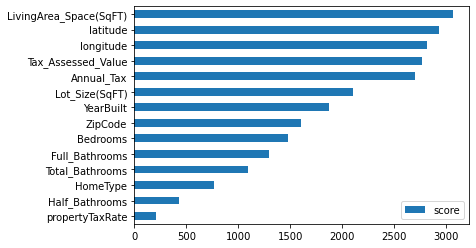

In [192]:
feature_important = best_model.get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score")
data.plot(kind='barh')

In [193]:
best_model.save_model("xgb_model.model")

In [302]:
erry = (y_test[y_test < 1000000])

In [303]:
errpred = (bm_pred_test[bm_pred_test <= 1023000])

In [300]:
len(y_test)

11853

In [304]:
print(mean_absolute_error(erry, errpred))
print(mean_squared_error(erry, errpred, squared=False))

227590.20294730726
283078.0509276518


In [301]:
print(mean_absolute_error(erry, errpred))
print(mean_squared_error(erry, errpred, squared=False))

2175691.3197008865
5364704.490327721


In [319]:
from sklearn.metrics import mean_squared_log_error

np.exp(np.sqrt(mean_squared_log_error(y_test, bm_pred_test)))

1.3389463494379483

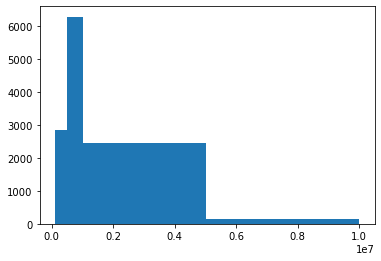

In [287]:
plt.hist(y_test, bins=[100000, 500000, 1000000, 5000000, 10000000])
plt.show()

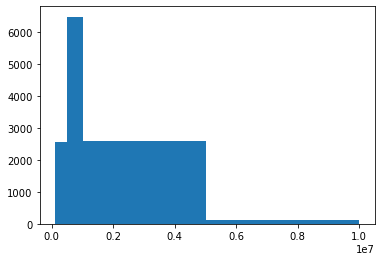

In [288]:
plt.hist(bm_pred_test, bins=[100000, 500000, 1000000, 5000000, 10000000])
plt.show()

In [313]:
import sys

np.set_printoptions(threshold=sys.maxsize)

In [314]:
y_test[y_test >= 1000000]

array([ 1495000.,  1650000.,  1365000.,  1695000.,  1325000.,  1300000.,
        2700000.,  2450000.,  1330000.,  2500000.,  1350000., 18121100.,
        3047500.,  1450000.,  1150000.,  2100000.,  1590000.,  1934675.,
        1399000.,  1167000.,  2850000.,  1700000.,  1320000.,  2150000.,
        1035000.,  1220000.,  7400000.,  1250000.,  1199000.,  1050000.,
        1205000.,  7495000.,  1625000.,  1440000.,  1085000.,  3580000.,
        2350000.,  1790500.,  4200000.,  1380000.,  4350000.,  8400000.,
        2200000.,  1249000.,  1350000.,  1050000.,  1098000., 15850000.,
        1175000., 10999000.,  1225000.,  3300000.,  1150000.,  1900000.,
        1030000.,  1300000.,  1265000.,  1050000.,  1110000.,  2720000.,
        1850000.,  1350000.,  1125000.,  1350000.,  1159500.,  2000000.,
        1925000.,  5900000.,  1175000.,  1400000.,  1515000.,  1250000.,
        1288888.,  1550000.,  3175000.,  1950000.,  1978520.,  1060000.,
        4618125.,  1950000.,  1760000.,  1250000., 

In [315]:
bm_pred_test[bm_pred_test >= 1023000]

array([ 1493646.6 ,  1273062.9 ,  1693364.5 ,  1062638.5 ,  3603468.2 ,
        2038316.1 ,  1224175.9 ,  2394754.5 ,  1629309.9 ,  1873917.1 ,
        1907013.8 ,  1588188.8 ,  7129684.5 ,  2907308.  ,  1603214.8 ,
        1049515.5 ,  2413210.  ,  1788641.5 ,  1807672.8 ,  1391439.2 ,
        1152838.8 ,  2164056.  ,  1026457.6 ,  2353509.5 ,  1604972.4 ,
        2100393.5 ,  1738601.  ,  2028745.6 ,  1273787.9 ,  1438155.8 ,
        1211937.  ,  1169789.  , 14266993.  ,  1562245.6 ,  1077493.6 ,
        1507335.2 ,  1108981.9 ,  1080430.2 ,  1651511.8 ,  3198557.5 ,
        3046173.  ,  1670537.9 ,  1342172.8 ,  1093349.6 ,  3555310.2 ,
        1906666.4 ,  1952306.1 ,  1273763.6 ,  1499727.1 , 16553443.  ,
        1146617.4 ,  7992738.  ,  1052139.1 ,  3249776.5 ,  1083549.6 ,
        1960904.5 ,  1116148.  ,  1442570.6 ,  1070525.6 ,  1056029.4 ,
        1221369.  ,  1400541.5 ,  1304134.1 ,  1333348.2 ,  2577575.  ,
        1079612.5 ,  1055169.6 ,  1272358.9 ,  1291347.1 ,  1061